# Data for TAO recycled

In [1]:
import bittensor as bt
import pandas as pd
from substrateinterface import SubstrateInterface
import matplotlib.pyplot as plt
import numpy as np

/Users/gustave/miniconda3/envs/bittensor/lib/python3.10/site-packages/eth_utils/network.py:44: UserWarning: Network 345 with name 'Yooldo Verse Mainnet' does not have a valid ChainId. eth-typing should be updated with the latest networks.
  warnings.warn(
/Users/gustave/miniconda3/envs/bittensor/lib/python3.10/site-packages/eth_utils/network.py:44: UserWarning: Network 12611 with name 'Astar zkEVM' does not have a valid ChainId. eth-typing should be updated with the latest networks.
  warnings.warn(


In [2]:
subtensor = bt.subtensor('archive')

In [3]:
substrate = SubstrateInterface(url="wss://archive.chain.opentensor.ai:443/")

In [4]:
block = substrate.get_block()['header']['number']
print(block)

3120822


In [5]:
# taking the data from the TAORecycledInterval function of the tao-reycled.ts script
## data from block 3011720 to block 3061227
TAO_recycled = {
  '1': 344.53,
  '2': 270.54,
  '3': 5.32,
  '4': 0.5,
  '5': 213.58,
  '6': 4.22,
  '7': 99.75,
  '8': 15,
  '9': 0.5,
  '10': 177.15,
  '11': 3.01,
  '12': 53.23,
  '13': 28.73,
  '14': 7.76,
  '15': 11.65,
  '16': 0,
  '17': 16.22,
  '18': 859.62,
  '19': 929.77,
  '20': 72.8,
  '21': 179.92,
  '22': 144.82,
  '23': 273.65,
  '24': 77.79,
  '25': 9.49,
  '26': 9.2,
  '27': 41.42,
  '28': 112,
  '29': 54.65,
  '30': 1.5,
  '31': 81.22,
  '32': 66.69,
  '33': 53.29,
  '34': 6.85
}

### TAO Recycled by subnet, 4 months

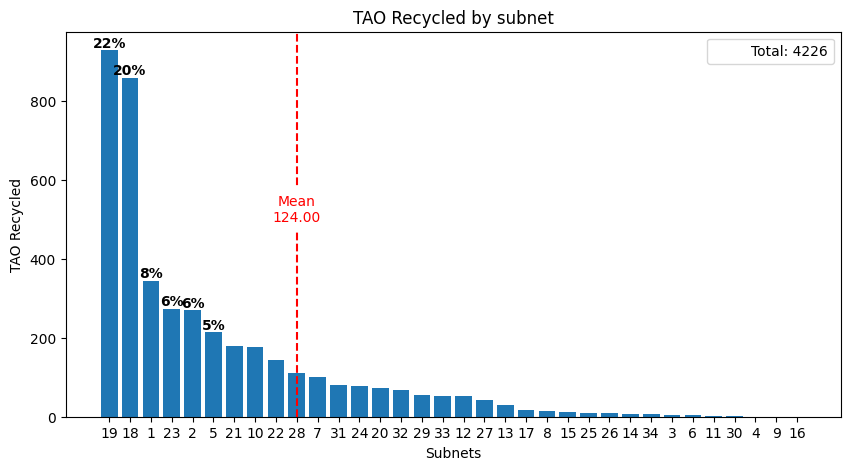

In [6]:
sorted_data = dict(sorted(TAO_recycled.items(), key=lambda item: item[1], reverse=True))

# Separate the keys and values
keys = list(sorted_data.keys())
values = list(sorted_data.values())

# Calculate total sum
total = round(sum(values))

# Calculate percentages
percentages = [round((value / total) * 100) for value in values]

mean_value = round(np.mean(values))
median_value = np.median(values)
percentile_10 = np.percentile(values, 90)

# Create the bar plot
plt.figure(figsize=(10, 5))  # Optional: Specify the size of the plot
bars = plt.bar(keys, values)

# Function to find the closest key to the given value
def find_closest_key(data, target):
    return min(data.keys(), key=lambda k: abs(data[k] - target))

# Find the closest keys
mean_key = find_closest_key(sorted_data, mean_value)
# median_key = find_closest_key(sorted_data, median_value)
percentile_10_key = find_closest_key(sorted_data, percentile_10)

# Plot vertical lines at the positions of mean, median, and 10th percentile
for key, value, label, color in zip([mean_key],
                                    [mean_value],
                                    ['Mean'],
                                    ['r']):
    plt.axvline(x=keys.index(key), color=color, linestyle='--')
    plt.text(keys.index(key), (plt.ylim()[1])/2, f'{label}\n{value:.2f}', 
             color=color, ha='center', va='bottom', backgroundcolor='white')


# Annotate bars with percentages
for bar, percent in zip(bars, percentages):
    height = bar.get_height()
    if percent > 4:
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percent:.0f}%', 
                ha='center', va='bottom', color='black', fontweight='bold')
    else:
        None


# Add total to the legend
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(plt.Line2D([0], [0], color='w', label=f'Total: {total}'))
plt.legend(handles=handles)

# Add titles and labels
plt.title('TAO Recycled by subnet')
plt.xlabel('Subnets')
plt.ylabel('TAO Recycled')

# Show the plot
plt.show()

In [10]:
# live_emissions
recycling_data = pd.DataFrame(columns=[
    'Subnets',
    'burn_cost', 
    'target_regs_per_interval',
    'min_burn',
    'adjustment_alpha',
    'emission'
    ])

for i in range(1, 35):
    hyperparameters = subtensor.get_subnet_hyperparameters(i, block)
    info = subtensor.get_subnet_info(i, block)
    emission = subtensor.get_emission_value_by_subnet(i, block)
    
    # Append a new row to the DataFrame
    recycling_data.loc[i] = {
        'Subnets': i,
        'burn_cost': float(info.burn),
        'target_regs_per_interval': hyperparameters.target_regs_per_interval,
        'min_burn': hyperparameters.min_burn / (10**9),
        'adjustment_alpha': hyperparameters.adjustment_alpha,
        'emission': float(emission)
    }


TAO_recycled = {int(k): v for k, v in TAO_recycled.items()}

# Add the dictionary values as a new column based on the DataFrame's index
recycling_data['TAO_recycled'] = recycling_data.index.map(TAO_recycled)


# recycling_data['TAO_recycled'] = pd.Series(TAO_recycled)

# recycling_data.set_index('Subnets', inplace=True)

### Charting the quantity of TAO recycled by subnet, w/ SN sorted by burn cost

In [ ]:
recycling_data_sorted = recycling_data.sort_values(by='burn_cost', ascending=False)
recycling_data_sorted.reset_index(drop=True, inplace=True)
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(recycling_data_sorted.index, recycling_data_sorted['TAO_recycled'])
plt.xlabel('Subnets')
plt.ylabel('TAO Recycled')
plt.title('TAO Recycled by Subnet')
plt.xticks(rotation=45)
plt.show()


### Charting the quantity of TAO recycled by subnet, w/ SN sorted by emission

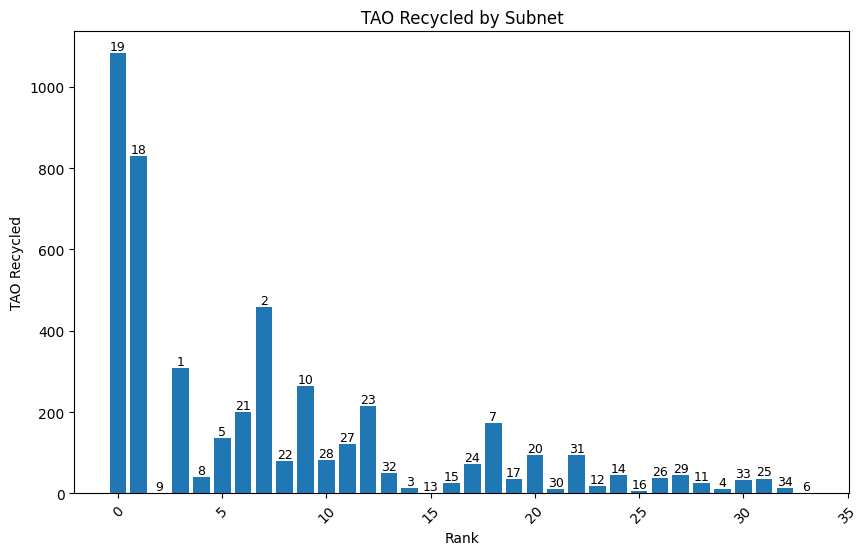

In [48]:
# computing the mean and sorting the data
mean_tao_recycled = recycling_data['TAO_recycled'].mean()
recycling_data_sorted = recycling_data.sort_values(by='emission', ascending=False)
recycling_data_sorted.reset_index(drop=True, inplace=True)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(recycling_data_sorted.index, recycling_data_sorted['TAO_recycled'])
plt.xlabel('Rank')
plt.ylabel('TAO Recycled')
plt.title('TAO Recycled by Subnet, sorted by emission')
plt.xticks(rotation=45)

# Add labels for subnets with 'tao_recycled' above the mean
for bar, (_, row) in zip(bars, recycling_data_sorted.iterrows()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(row['Subnets']),
            ha='center', va='bottom', fontsize=9, color='black')

plt.show()


### Historical TAO reycled for a subnet

In [1]:
# taking the data from the TAORecycledbyPeriod function of the tao-reycled.ts script
# params: new Date('2024-04-05'), 2, 2701227 , 3062120, 7200
data = {
  '2024-05-22': 6.59,
  '2024-05-23': 14.54,
  '2024-05-24': 4.28,
  '2024-05-25': 4.78,
  '2024-05-26': 2.16,
  '2024-05-27': 3.13,
  '2024-05-28': 1.44,
  '2024-05-29': 2.02,
  '2024-05-30': 2.89,
  '2024-05-31': 1
}

In [5]:
# Convert the dictionary into a pandas DataFrame
historical_recycle = pd.DataFrame(list(data.items()), columns=['Date', 'TAO Recycled'])

# Convert the 'Date' column to datetime objects
historical_recycle['Date'] = pd.to_datetime(historical_recycle['Date']).dt.strftime('%m-%d')

# Set the 'Date' column as the index of the DataFrame
historical_recycle.set_index('Date', inplace=True)

# Sort the DataFrame by the index (Date)
historical_recycle.sort_index(inplace=True)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /var/folders/dw/5hbpys7d231g5w2yrjk036600000gn/T/ipykernel_67215/4073874950.py:14 in <module>    │
│                                                                                                  │
│ [Errno 2] No such file or directory:                                                             │
│ '/var/folders/dw/5hbpys7d231g5w2yrjk036600000gn/T/ipykernel_67215/4073874950.py'                 │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: text() missing 2 required positional arguments: 'y' and 's'

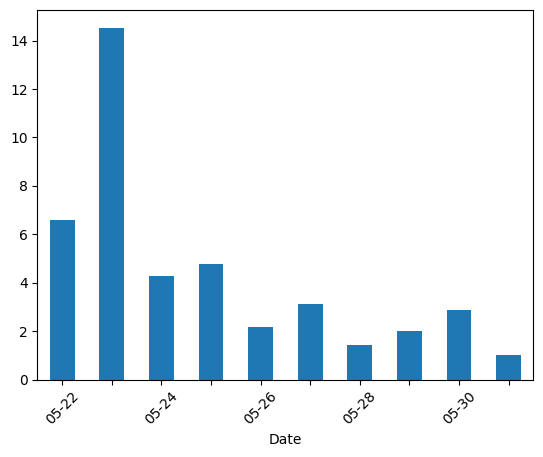

In [7]:
ax = historical_recycle.plot(kind='bar')
plt.xticks(rotation=45)
# Customize x-axis to show every other label
xticks = ax.get_xticks()
xticks_labels = ax.get_xticklabels()

# Set the labels to empty for every other label
for i, label in enumerate(xticks_labels):
    if i % 2 != 0:
        label.set_visible(False)
plt.legend().remove()

# Add a comment using plt.text
plt.text('Final dates are too early', fontsize=8, color='black', ha='center', rotation=90)

plt.title('Daily TAO recycled - SN2')
plt.show()